No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de regressão, classificação e regressão logística.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

# Imports e Configurações

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. O Perceptron nada mais é que um  classificador/regressor linear responsável por mapear uma ou mais entradas em uma saída desejada. Além disso, o método de aprendizagem do Perceptron é adaptativo, ou seja, os melhores parâmetros são aprendidos utilizando algum método de minimização conhecido. Em geral, esse método é o _Gradiente Descendente_, mas outros métodos de minimização podem ser utilizados.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade D. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, também é alimentada por um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{w_ix_i} + b$$

- __função de ativação__ $f$: inicialmente, o perceptron foi projetado para utilizar a função de ativação linear, ou seja, o resultado da junção aditiva representava a saída do Perceptron.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred} = f(\sum_i^D{w_ix_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x$: representa os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: função de ativação.
- $y_{pred}$: representa a saída do Perceptron (o valor predito).


## Como o Perceptron Aprende?

Se você já leu sobre o Perceptron antes, você provavelmente já viu que o modo como o perceptron aprende - isto é, a forma como os pesos são atualizados -, dá-se pela seguite fórmula:

$$w_i = w_i + \lambda(y_i - y_{pred})x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, imagine que estamos utilizando um Perceptron para regressão, cuja função de custo geralmente é:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - y_{pred_i})^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, está se dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - y_{pred_i})^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - y_{pred_i})^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - y_{pred_i})\frac{\partial}{\partial w_i}(y_i - y_{pred_i})$$

Repare que, quando derivamos $(y_i - y_{pred_i})^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $y_{pred_i} = w_i*x_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - y_{pred_i})(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - y_{pred_i})x_i$$

Na forma vetorizada, essa equação torna-se:

$$\frac{\partial J}{\partial \overrightarrow{w}} = (\overrightarrow{y} - \overrightarrow{y}_{pred})-\overrightarrow{x}$$

# Regressão 

In [3]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


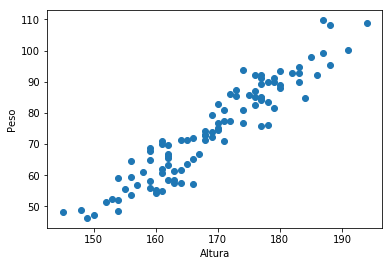

In [19]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [20]:
print(x.shape, y.shape)

(100,) (100,)


In [21]:
x = x.reshape(-1, 1)

print(x.shape)

(100, 1)


### Python

In [24]:
from random import random

D = x.shape[1]
w = 2*random() - 1 # [1, 1]
b = 2*random() - 1 # [1, 1]

for step in range(10000):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = w*x_i + b
        error = y_i - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b)

step 0: [ 3321.10958861]
step 1000: [-7.43004495]
step 2000: [-3.1179807]
step 3000: [-1.3084448]
step 4000: [-0.54908223]
step 5000: [-0.23041957]
step 6000: [-0.09669441]
step 7000: [-0.04057732]
step 8000: [-0.01702807]
step 9000: [-0.00714574]
[ 1.36978216] [-157.8785105]


## Numpy 

### Versão não-vetorizada

In [25]:
D = x.shape[1]
w = 2*np.random.random((1, D)) - 1 # [1, 1]
b = 2*np.random.random() - 1       # [1, 1]

for step in range(10000):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        # y_pred = w*x_i + b
        # y_pred = np.dot(w, x_i) + b
        y_pred = np.dot(w, x_i.T) + b # [1,1] x [1,1] + [1,1] = [1,1]
        error = y_i - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b)

step 0: [-2038.8269532]
step 1000: [-4.72397444]
step 2000: [-1.98239192]
step 3000: [-0.83190072]
step 4000: [-0.34910292]
step 5000: [-0.14649927]
step 6000: [-0.06147768]
step 7000: [-0.0257988]
step 8000: [-0.01082633]
step 9000: [-0.00454322]
[[ 1.36985749]] [-157.89109316]


### Versão vetorizada

In [26]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1, 1]
b = 2*np.random.random()-1       # [1, 1]

for step in range(10000):
    y_pred = np.dot(w, x.T) + b # [1,1]x[1,100] + [1,1] = [1,100]
    error = y - y_pred # [1,100] + [100] = [1,100]
    w = w + 1e-7*np.dot(error, x) # [1,1] + [1,100]x[100,1] = [1,1]
    b = b + 1e-2*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 11861.57605
step 1000: -9.13164
step 2000: -3.81288
step 3000: -1.59205
step 4000: -0.66476
step 5000: -0.27757
step 6000: -0.11590
step 7000: -0.04839
step 8000: -0.02021
step 9000: -0.00844
[[ 1.37125724]] -157.431825351


## Keras 

## TensorFlow 

# Regressão Logística

# Classificação